In [1]:
import matplotlib as plt

In [2]:
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
#!pip install mysql-connector-python

In [5]:
#import os

In [6]:
import mysql.connector

In [7]:
import numpy as np

In [8]:
# List of CSV files and their corresponding table names
#csv_files = [('Categories.csv', 'Categories'),
#('Customers.csv', 'Customers'),
#('Geolocation.csv', 'Geolocation'),
#('Order Items.csv', 'Order_Items'),
#('Order Payments.csv', 'Order_Payments'),
#('Orders.csv', 'Orders'),
#('Products.csv', 'Products'),
#('Reviews.csv', 'Reviews'),
#('Sellers.csv', 'Sellers') ]

#connect to mysql
#conn = mysql.connector.connect(
    #host='localhost',
   # user='root',
  # password='Mysql@4444',
 #  database='sql_python_ecommerce_project'  # or your schema name
#)

#cursor = conn.cursor()
#Folder containing the CSV files
#folder_path = 'C:/Users/Personal PC/Desktop/New job role expected from Ajit Sharma/SQL Practice/Sept_25_New_Project/SQL-Python-Ecommerce-Project-main_from author/Dataset'

#def get_sql_type(dtype):
    #if pd.api.types.is_integer_dtype(dtype):
     #   return 'INT'
    #elif pd.api.types.is_float_dtype(dtype):
     #   return 'FLOAT'
    #elif pd.api.types.is_bool_dtype(dtype):
     #   return 'BOOLEAN'
    #elif pd.api.types.is_datetime64_any_dtype(dtype):
   #     return 'DATETIME'
  #  else:
 #       return 'TEXT'

#for csv_file, table_name in csv_files:
    #file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    #df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    #df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    #print(f"Processing {csv_file}")
    #print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    #df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    #columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    #create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    #cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    #for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
    #    values = tuple(None if pd.isna(x) else x for x in row)
   #     sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
  #      cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
 #   conn.commit()

# Close the connection
#conn.close()


 



In [9]:
db = mysql.connector.connect(
     host='localhost',
    user='root',
   password='Mysql@4444',
   database='sql_python_ecommerce_project'
)

cur = db.cursor()

# 1. List all unique cities where customers are located. 

In [10]:
query = """ select distinct upper(customer_city) from customers """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["Customer_city"])
df

,Customer_city
0,FRANCA
1,SAO BERNARDO DO CAMPO
2,SAO PAULO
3,MOGI DAS CRUZES
4,CAMPINAS
...,...
4114,SIRIJI
4115,NATIVIDADE DA SERRA
4116,MONTE BONITO
4117,SAO RAFAEL


In [11]:
#Data cleaning done on orders.csv 'only date was retreive in dated columns'

#import pandas as pd
#from datetime import datetime
#import re

# Step 1: Read the CSV file
#df = pd.read_csv('dataset_for_orders.csv')

# Step 2: Define the date columns to clean (excluding A & B)
#date_columns = [
#    'order_purchase_timestamp',
 #   'order_approved_at',
  #  'order_delivered_carrier_date',
   # 'order_delivered_customer_date',
    #'order_estimated_delivery_date'
#]

# Step 3: Function to extract only the date part from various formats
#def clean_date(date_str):
  #  if pd.isna(date_str):
 #       return ''
    
    # Extract only the date part using regex (handles formats like '10-02-17 10:56', '8/13/2018 0:00')
#    match = re.search(r'(\d{1,2}[-/]\d{1,2}[-/]\d{2,4})', str(date_str))
 #   if match:
  #      try:
            # Try to parse and reformat to YYYY-MM-DD
   #         return pd.to_datetime(match.group(1), dayfirst=True).strftime('%Y-%m-%d')
    #    except:
     #       return match.group(1)  # fallback to raw match if parsing fails
    #return ''

# Step 4: Apply cleaning to each date column
#for col in date_columns:
 #   df[col] = df[col].apply(clean_date)

# Step 5: Save cleaned data to new CSV
#df.to_csv('cleaned_output.csv', index=False)

#print("Data cleaned and saved to 'cleaned_output.csv'.")


In [12]:
import pandas as pd
import mysql.connector



db = mysql.connector.connect(
     host='localhost',
    user='root',
   password='Mysql@4444',
   database='sql_python_ecommerce_project'  # or your schema name
)

cur = db.cursor()

# 2. Count the number of orders placed in 2017. 

In [13]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp)=2017  """

cur.execute(query)

data = cur.fetchall()

"Total orders placed in 2017 are", data[0][0]

('Total orders placed in 2017 are', 45101)

# 3. Find the total sales per category. 

In [14]:
query = """ select upper(products.product_category_name) Category, 
round(sum(order_payments.payment_value),2) Sales
from products join order_items
on products.product_id = order_items.product_id
join order_payments 
on order_payments.order_id = order_items.order_id
group by category """

cur.execute(query)

data = cur.fetchall()

#data
df = pd.DataFrame(data, columns=["Category", "Sales"])
df

,Category,Sales
0,PERFUMARIA,506738.66
1,MOVEIS_DECORACAO,1430176.39
2,TELEFONIA,486882.05
3,FASHION_BOLSAS_E_ACESSORIOS,218158.28
4,CAMA_MESA_BANHO,1712553.67
...,...,...
69,CDS_DVDS_MUSICAIS,1199.43
70,LA_CUISINE,2913.53
71,FASHION_ROUPA_INFANTO_JUVENIL,785.67
72,PC_GAMER,2174.43


# 4. Calculate the percentage of orders that were paid in installments. 

In [15]:
query = """ select (sum(case when payment_installments >= 1 then 1 
else 0 end)) / count(*) * 100 from order_payments """

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments is " ,data[0][0]

('the percentage of orders that were paid in installments is ',
 Decimal('99.9981'))

# 5. Count the number of customers from each state. 

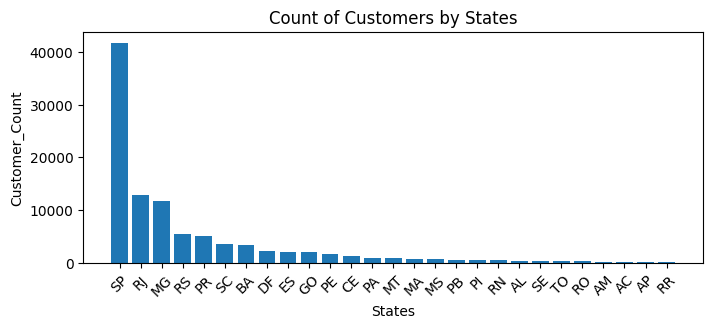

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
query = """ SELECT customer_state, count(customer_id) Counts_of_customer FROM sql_python_ecommerce_project.customers
group by customer_state """

cur.execute(query)

data = cur.fetchall()

df=pd.DataFrame(data, columns=["States", "Customer_Count"])
df = df.sort_values(by = "Customer_Count", ascending = False)

plt.figure(figsize = (8,3))
plt.bar(df["States"], df["Customer_Count"])
plt.xticks(rotation = 45)
plt.xlabel("States")
plt.ylabel("Customer_Count")
plt.title("Count of Customers by States")

plt.show()

# 1. Calculate the number of orders per month in 2018. 

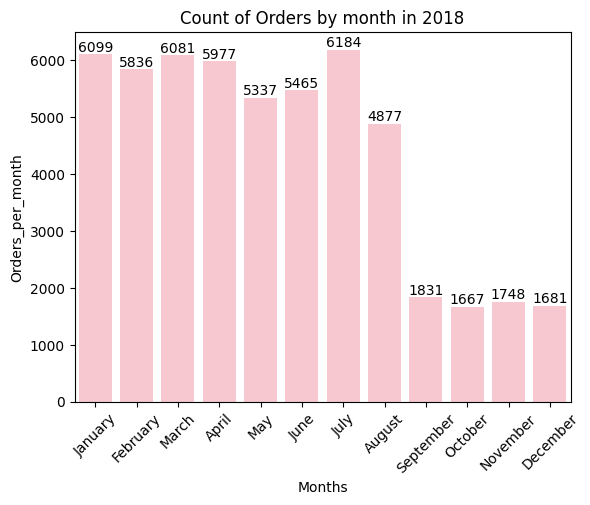

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
query = """ select monthname(order_purchase_timestamp) Months,count(order_id) from sql_python_ecommerce_project.orders where year(order_purchase_timestamp) = 2018 and order_status = 'delivered' group by Months 
order by Months """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=["Months", "Orders_per_month"])
o = ["January",  "February",  "March",  "April",  "May",  "June",  "July",  "August",  "September",  "October",  "November",  "December"]

ax = sns.barplot(x = df["Months"],y = df["Orders_per_month"], data = df, order = o, color = 'pink')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by month in 2018")
plt.show()

# 2. Find the average number of products per order, grouped by customer city. 

In [18]:
query = """ 
with count_per_order as 
(SELECT orders.order_id, orders.customer_id, count(order_items.order_id) oc 
FROM orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id
)
select upper(customers.customer_city), round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city
order by average_orders desc """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Customer_City", "Average number of products per orders"])
df.head(10)                  

,Customer_City,Average number of products per orders
0,PADRE CARVALHO,7.00
1,CELSO RAMOS,6.50
2,CANDIDO GODOI,6.00
3,DATAS,6.00
4,MATIAS OLIMPIO,5.00
5,MORRO DE SAO PAULO,4.00
6,CIDELANDIA,4.00
7,PICARRA,4.00
8,TEIXEIRA SOARES,4.00
9,CURRALINHO,4.00


# 3. Calculate the percentage of total revenue contributed by each product category. 

In [19]:
query = """ select upper(products.product_category_name) Category, 
round((sum(order_payments.payment_value)/(select sum(payment_value) from order_payments) )*100,2)  Sales_percent 
from products join order_items
on products.product_id = order_items.product_id
join order_payments 
on order_payments.order_id = order_items.order_id
group by category
order by Sales_percent desc """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=["Category", "Sales_Percentage"])
df

,Category,Sales_Percentage
0,CAMA_MESA_BANHO,10.70
1,BELEZA_SAUDE,10.35
2,INFORMATICA_ACESSORIOS,9.90
3,MOVEIS_DECORACAO,8.93
4,RELOGIOS_PRESENTES,8.93
...,...,...
69,CASA_CONFORTO_2,0.01
70,CDS_DVDS_MUSICAIS,0.01
71,PC_GAMER,0.01
72,FASHION_ROUPA_INFANTO_JUVENIL,0.00


# 4. Identify the correlation between product price and the number of times a product has been purchased. 

In [20]:
query = """ select upper(products.product_category_name) Category, 
count(order_items.product_id) Order_Count,
round(avg(order_items.price),2) Price
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category_name """

cur.execute(query)

data = cur.fetchall()

#data
df = pd.DataFrame(data, columns=["Category", "Order_Count", "Price"])

arr1 = df["Order_Count"]
arr2 = df["Price"]

a = np.corrcoef([arr1, arr2])
print('The correlation between product price and the number of times a product has been purchased is', a [0][-1])

The correlation between product price and the number of times a product has been purchased is -0.10631514167157562


# 5. Calculate the total revenue generated by each seller, and rank them by revenue. 

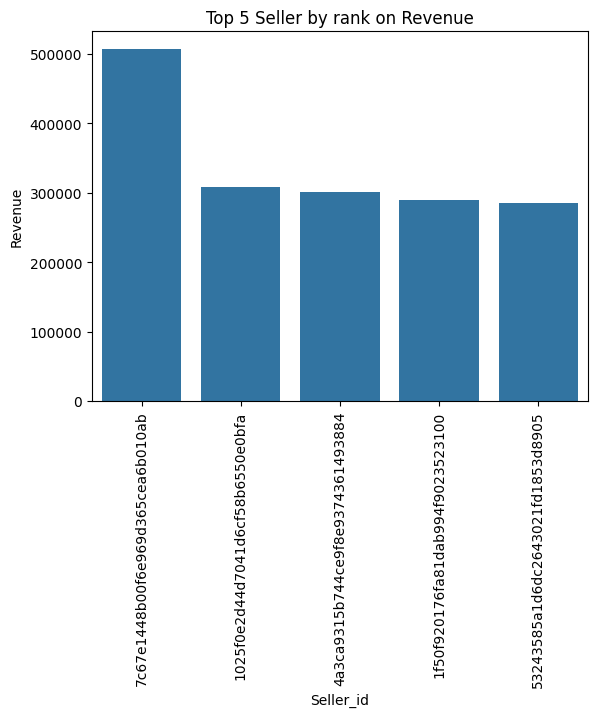

In [21]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(
select order_items.Seller_id, round(sum(order_payments.payment_value),2) Revenue
from order_items join order_payments
on order_items.order_id = order_payments.order_id
group by order_items.seller_id 
) as a """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=["Seller_id", "Revenue", "Rank"])
df=df.head()
sns.barplot(x = "Seller_id", y ="Revenue", data = df)
plt.xticks(rotation = 90)
plt.title("Top 5 Seller by rank on Revenue")
plt.show()

# 1. Calculate the moving average of order values for each customer over their order history. 

In [22]:
query = """ select customer_id, order_purchase_timestamp, Payment,
avg(payment) over (partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) mov_avg
from 
(SELECT orders.customer_id, orders.order_purchase_timestamp, 
order_payments.payment_value as Payment
from order_payments join orders
on order_payments.order_id = orders.order_id) a 
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=["customer_id", "order_purchase_timestamp", "Payment", "Mov_Avg"])
df

,customer_id,order_purchase_timestamp,Payment,Mov_Avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-02-04,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29,0.64,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-02-09,45.50,45.500000


# 2. Calculate the cumulative sales per month for each year. 

In [23]:
query = """ select years, months, payment, round(sum(payment)
over(order by years, months),2) cumulative_sales from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(order_payments.payment_value),2) as payment 
from orders join order_payments
on orders.order_id = order_payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=["Years", "Months", "Payments", "Cumulative_sales"])
df.head()

,Years,Months,Payments,Cumulative_sales
0,2016,2,109.34,109.34
1,2016,3,595.14,704.48
2,2016,4,12050.88,12755.36
3,2016,5,10287.28,23042.64
4,2016,6,9398.61,32441.25


# 3. Calculate the year-over-year growth rate of total sales. 

In [25]:
query = """ use sql_python_ecommerce_project;

with a as (select year(orders.order_purchase_timestamp) as years,
round(sum(order_payments.payment_value),2) as payment from orders join order_payments
on orders.order_id = order_payments.order_id
group by years order by years
)

select years, ((payment - lag(payment, 1) over (order by years)) / 
lag(payment, 1) over(order by years)) * 100 from a 
"""
cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=["Years", "YoY % Growth"])
df

,Years,YoY % Growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase. 

In [28]:
query = """ with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id
),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id
)

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id))
from a left join b 
on a.customer_id = b.customer_id """

cur.execute(query)

data = cur.fetchall()
data

[(None,)]

# 5. Identify the top 3 customers who spent the most money in each year. 

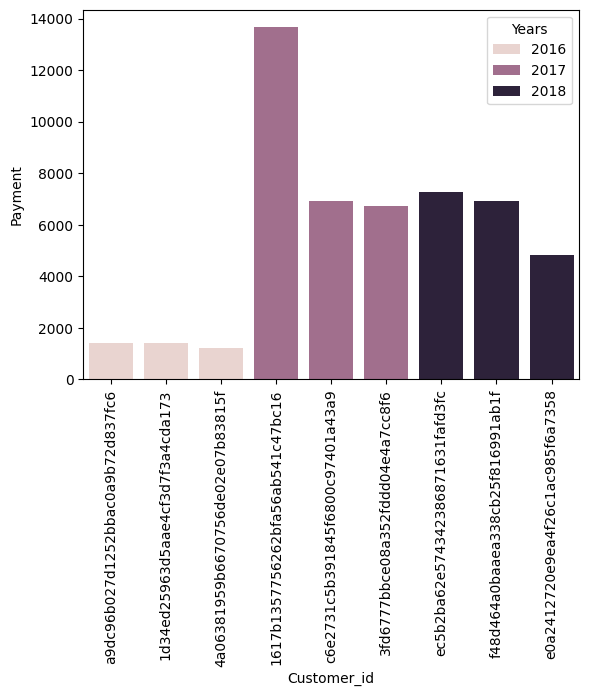

In [32]:
query = """ select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id, 
sum(order_payments.payment_value) payment,
dense_rank() over (partition by year(orders.order_purchase_timestamp)
order by sum(order_payments.payment_value)desc) d_rank
from orders join order_payments
on order_payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp), 
orders.customer_id) as a  
where d_rank <= 3;
 """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Years", "Customer_id", "Payment", "D_Rank"])
sns.barplot(x = "Customer_id", y = "Payment", data = df, hue = "Years")
plt.xticks(rotation = 90)
plt.show()